In [2]:
import gzip
import os
import sys
import struct
import numpy as np

def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

In [ ]:
!wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

np.savez_compressed(
    'mnist',
    train_x=read_image(gzip.open('train-images-idx3-ubyte.gz', 'rb')),
    train_y=read_label(gzip.open('train-labels-idx1-ubyte.gz', 'rb')),
    test_x=read_image(gzip.open('t10k-images-idx3-ubyte.gz', 'rb')),
    test_y=read_label(gzip.open('t10k-labels-idx1-ubyte.gz', 'rb'))
)

data = np.load('mnist.npz')

print(data['train_x'].shape, data['train_x'].dtype)

In [ ]:
#from google.colab import files
#files.upload()

Saving mnist_train.csv to mnist_train.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

mnist = pd.read_csv("mnist_train.csv")

In [ ]:
mnist.shape
mnist.head(10)
mnist.columns

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)

In [ ]:
labels = mnist.loc[:,'5']
data = mnist.loc[:,'0':'0.617'] 
# data = mnist.drop('5',axis=1)

In [ ]:
data.iloc[1].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   

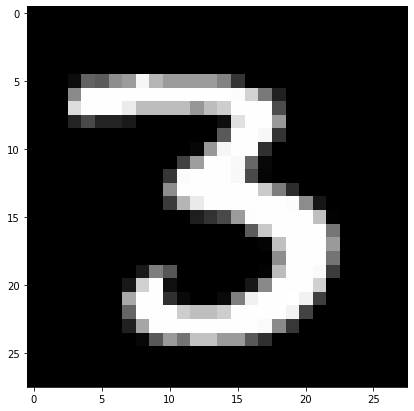

In [ ]:
plot.figure(figsize = (7,7))
idx =11

grid_data = data.iloc[idx].to_numpy().reshape(28,28)
plot.imshow(grid_data, cmap='gray')

In [ ]:
grid_data.shape

(28, 28)

In [ ]:
from sklearn.preprocessing import StandardScaler
st_data = StandardScaler().fit_transform(data)
st_data[0:3,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
_data = st_data
cov = np.matmul(_data.T, _data)
cov.shape

(784, 784)

In [ ]:
from scipy.linalg import eigh
import matplotlib.pyplot as plt

In [ ]:
evals, evecs = eigh(cov,eigvals=(782,783))

In [ ]:
evecs.shape

(784, 2)

In [ ]:
evecs = evecs.T
evecs.shape

(2, 784)

In [ ]:
_data.shape

(59999, 784)

In [ ]:
proj = np.matmul(_data, evecs.T)

In [ ]:
labels = labels.T


In [ ]:
labels.shape

(59999,)

In [ ]:
p_data = np.vstack((proj.T,labels))

In [ ]:
p_data[11]

array([10.30078539,  4.0269028 ,  3.        ])

In [ ]:
df =pd.DataFrame(data= p_data, columns=("PC1","PC2","label"))

In [ ]:
 import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


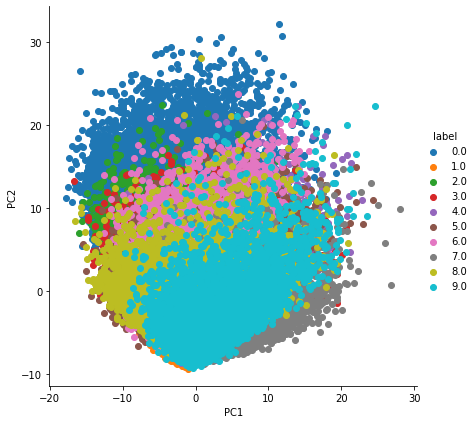

In [ ]:
sns.FacetGrid(df,hue="label",size=6)\
.map(plt.scatter,'PC1','PC2').add_legend()

In [ ]:
evals[1]

2429196.1545425137

In [ ]:
#%explained

perc = evals/np.sum(evals,axis=0)

In [ ]:
perc

array([0.4193597, 0.5806403])